In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import requests
from io import StringIO
import json

In [138]:
url = 'https://api.synopticdata.com/v2/stations/timeseries'
parameters = {'stid':'mtmet',
             'token':'ff2bd7cda299484eb4568eec2afd5b2c',
             'start':'202001010000',
             'end':'202001312359',
             'output':'csv'}
             #'vars':['Date_Time', 'precip_accum_one_hour_set', 'snow_interval_set_1', 'snow_depth_set_1', 'air_temp_set_1']}


r = requests.get(url, params = parameters)
data = r.text
print(r.status_code, data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [81]:
#data = StringIO(data)
#print(type(data))
splitString = data.split('\n')
metaData = '\n'.join(splitString[:6])
print(metaData)
colNames = splitString[6]
#print(len(splitString))
goodData = '\n'.join(splitString[6:])
goodData = StringIO(goodData)
df = pd.read_csv(goodData, low_memory = False)

print(df.shape)
df.head()

# STATION: MTMET
# STATION NAME: U of U Mountain Met Lab
# LATITUDE: 40.766573
# LONGITUDE: -111.828211
# ELEVATION [ft]: 4996
# STATE: UT
(44641, 44)


,Station_ID,Date_Time,pressure_set_1,pressure_set_2,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,...,cloud_layer_1_set_1d,cloud_layer_3_set_1d,cloud_layer_2_set_1d,wind_chill_set_1d,wind_cardinal_direction_set_1d,sea_level_pressure_set_1d,heat_index_set_1d,wet_bulb_temperature_set_1d,altimeter_set_1d,altimeter_set_2d
0,NaN,NaN,Pascals,Pascals,Celsius,%,m/s,Degrees,m/s,Millimeters,...,code,code,code,Celsius,code,Pascals,Celsius,Celsius,Pascals,Pascals
1,MTMET,2020-01-01T00:00:00Z,85166.0,85330.0,-1.69,64.19,0.7,36.42,0.92,4.572,...,NaN,NaN,NaN,NaN,NE,102801.64,NaN,NaN,102351.26,102548.35
2,MTMET,2020-01-01T00:01:00Z,85160.0,NaN,-1.73,64.54,0.86,41.39,1.28,4.572,...,NaN,NaN,NaN,NaN,NE,102797.19,NaN,NaN,102344.05,NaN
3,MTMET,2020-01-01T00:02:00Z,85158.0,NaN,-1.79,64.95,1.45,32.26,1.88,4.572,...,NaN,NaN,NaN,NaN,NNE,102798.98,NaN,NaN,102341.65,NaN
4,MTMET,2020-01-01T00:03:00Z,85158.0,NaN,-1.84,65.29,1.65,59.3,2.21,4.318,...,NaN,NaN,NaN,NaN,ENE,102802.48,NaN,NaN,102341.65,NaN


In [95]:
#df.drop(df.columns.difference(['Station_ID','Date_Time','snow_depth_set_1']), 1, inplace=True)
#df.rename(columns={"snow_depth_set_1": "snowDepth, mm"},inplace=True)
#df.drop([0],inplace = True)

n = len(df.Station_ID)
df['snowDepth, mm'] = [float(df['snowDepth, mm'].iloc[i]) for i in range(n)]
df.head()

,Station_ID,Date_Time,"snowDepth, mm","deltaSnow, mm"
1,MTMET,2020-01-01T00:00:00Z,4.572,0
2,MTMET,2020-01-01T00:01:00Z,4.572,0
3,MTMET,2020-01-01T00:02:00Z,4.572,0
4,MTMET,2020-01-01T00:03:00Z,4.318,0
5,MTMET,2020-01-01T00:04:00Z,4.318,0


In [103]:
dSnow = np.repeat(0.,n)
for i in range(n-1):
    dSnow[i+1] = df['snowDepth, mm'].iloc[i+1] - df['snowDepth, mm'].iloc[i]

df['deltaSnow, mm'] = dSnow

df.head()

,Station_ID,Date_Time,"snowDepth, mm","deltaSnow, mm"
1,MTMET,2020-01-01T00:00:00Z,4.572,0.000
2,MTMET,2020-01-01T00:01:00Z,4.572,0.000
3,MTMET,2020-01-01T00:02:00Z,4.572,0.000
4,MTMET,2020-01-01T00:03:00Z,4.318,-0.254
5,MTMET,2020-01-01T00:04:00Z,4.318,0.000


In [125]:
#df['Date'] = [df.Date_Time.iloc[i][:10] for i in range(n)]
#df.drop(columns='Date_Time', inplace=True)
df2 = df.groupby('Date').sum()
df2.head()

,"snowDepth, mm","deltaSnow, mm"
Date,,
2020-01-01,19632.168,27.686
2020-01-02,34928.810,-27.178
2020-01-03,48769.270,20.066
2020-01-04,35403.790,-15.748
2020-01-05,19262.852,5.588


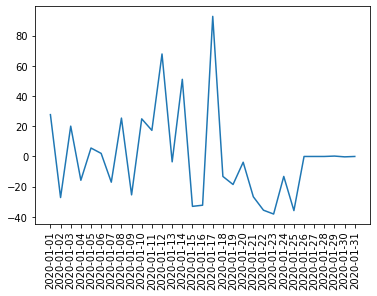

In [129]:
plt.plot(df2.index, df2['deltaSnow, mm'])
plt.xticks(df2.index, rotation = 90)
plt.show()